In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import data_cleaning as dc
import models as md


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import  XGBClassifier


from tqdm.notebook import tqdm, tqdm_notebook
from time import sleep
import time

#Tuning
from sklearn.model_selection import GridSearchCV, learning_curve, KFold, ParameterGrid, train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer, OneHotEncoder

#Metrics

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, roc_auc_score, precision_score,accuracy_score,roc_curve

from importlib import reload
pd.options.mode.chained_assignment = None

In [120]:
reload(dc);
reload(md);

### Modélisation

In [47]:
df = dc.load_and_clean_datasets()
#Print shape
print("Le dataset contient {} lignes et {} colonnes".format(df.shape[0], df.shape[1]))
df.head()

Le dataset contient 471149 lignes et 11 colonnes


,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue
0,other_classes,X-RAY DIFFRACTION,others_macro_mol,20,1.90,6360.30,vapor diffusion hanging drop,293.0,1.78,30.89,neutre
1,other_classes,X-RAY DIFFRACTION,others_macro_mol,20,1.90,6360.30,vapor diffusion hanging drop,293.0,1.78,30.89,neutre
2,other_classes,X-RAY DIFFRACTION,others_macro_mol,24,2.25,7939.35,vapor diffusion hanging drop,293.0,2.00,38.45,neutre
3,other_classes,X-RAY DIFFRACTION,others_macro_mol,24,2.25,7939.35,vapor diffusion hanging drop,293.0,2.00,38.45,neutre
4,other_classes,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,vapor diffusion hanging drop,293.0,3.09,60.20,basique


### Analyse de la distribution des variables numériques

In [32]:
# Ajouter diagrammes distribution pour montrer l'asymétrie de certaines variables
len(df.columns)

6

In [48]:
# Correction de l'assymétrie des variables
df = md.handle_skewness(df)


(471149, 11)

In [50]:
df.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol
count,471149.000000,471149.000000,471149.000000,471149.000000,471149.000000,471149.000000
mean,7.254012,0.958419,12.099898,5.674588,1.010708,54.155949
std,1.634903,0.432596,1.723614,0.052715,0.218151,9.341389
min,0.000000,-0.733969,6.117106,1.386294,-0.235722,0.000000
25%,6.122493,0.693147,10.873638,5.676754,0.871293,48.410000
50%,7.038784,0.916291,11.784010,5.680173,0.982078,53.950000
75%,8.418036,1.115142,13.361889,5.680173,1.118415,59.820000
max,12.654712,4.248495,18.397725,5.986452,4.595120,92.000000


### Discretisation des variables catégorielles

In [51]:
num_data = df.select_dtypes(include = "number")
num_data = md.scaleData(num_data)
num_data.head()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol
0,-2.604609,-0.731780,-1.938991,0.105939,-1.989886,-2.490633
1,-2.604609,-0.731780,-1.938991,0.105939,-1.989886,-2.490633
2,-2.493091,-0.340939,-1.810333,0.105939,-1.455696,-1.681331
3,-2.493091,-0.340939,-1.810333,0.105939,-1.455696,-1.681331
4,-1.356081,-0.533686,-1.331810,0.105939,0.538450,0.647019


In [53]:
for col in num_data:
    df[col] = num_data[col]
df.head()

,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue
0,other_classes,X-RAY DIFFRACTION,others_macro_mol,-2.604609,-0.731780,-1.938991,vapor diffusion hanging drop,0.105939,-1.989886,-2.490633,neutre
1,other_classes,X-RAY DIFFRACTION,others_macro_mol,-2.604609,-0.731780,-1.938991,vapor diffusion hanging drop,0.105939,-1.989886,-2.490633,neutre
2,other_classes,X-RAY DIFFRACTION,others_macro_mol,-2.493091,-0.340939,-1.810333,vapor diffusion hanging drop,0.105939,-1.455696,-1.681331,neutre
3,other_classes,X-RAY DIFFRACTION,others_macro_mol,-2.493091,-0.340939,-1.810333,vapor diffusion hanging drop,0.105939,-1.455696,-1.681331,neutre
4,other_classes,X-RAY DIFFRACTION,Protein,-1.356081,-0.533686,-1.331810,vapor diffusion hanging drop,0.105939,0.538450,0.647019,basique


In [54]:
cat_data = df.select_dtypes(include = object).drop('classification', axis=1)
df = pd.get_dummies(df, prefix_sep= '_', drop_first=False, columns=cat_data.columns)
df.head()

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,experimentalTechnique_X-RAY DIFFRACTION,experimentalTechnique_others_tech_exp,macromoleculeType_Protein,...,macromoleculeType_Protein#RNA,macromoleculeType_others_macro_mol,crystallizationMethod_microbatch,crystallizationMethod_others_cryst_method,crystallizationMethod_vapor diffusion,crystallizationMethod_vapor diffusion hanging drop,crystallizationMethod_vapor diffusion sitting drop,phValue_acide,phValue_basique,phValue_neutre
0,other_classes,-2.604609,-0.731780,-1.938991,0.105939,-1.989886,-2.490633,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,other_classes,-2.604609,-0.731780,-1.938991,0.105939,-1.989886,-2.490633,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,other_classes,-2.493091,-0.340939,-1.810333,0.105939,-1.455696,-1.681331,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,other_classes,-2.493091,-0.340939,-1.810333,0.105939,-1.455696,-1.681331,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,other_classes,-1.356081,-0.533686,-1.331810,0.105939,0.538450,0.647019,1,0,1,...,0,0,0,0,0,1,0,0,1,0


In [55]:
df.shape

(471149, 21)

### Preprocessing

In [57]:
#Selection données et cible
data = df.drop('classification', axis=1)
target = df.classification

In [59]:
#Split into train/test arrays
X_train, X_test, y_train,  y_test = train_test_split(data, target, test_size=0.3, random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((329804, 20), (141345, 20), (329804,), (141345,))

### Models training

In [75]:
models = [ExtraTreesClassifier(),BaggingClassifier(),
            RandomForestClassifier(),DecisionTreeClassifier()]
             #KNeighborsClassifier(),XGBClassifier(),
              #GradientBoostingClassifier(),SVC(), LinearDiscriminantAnalysis(), 
              #MLPClassifier(),LogisticRegression(), AdaBoostClassifier()]


In [76]:
scores = md.train_models(models, X_train, y_train)

  0%|          | 0/4 [00:00<?, ?it/s]

In [77]:
# Display training scores
scores


{'ExtraTreesClassifier': [0.9003953939778204],
 'BaggingClassifier': [0.8934427761395917],
 'RandomForestClassifier': [0.8985306459780353],
 'DecisionTreeClassifier': [0.8772968232905403]}

In [114]:
m_df = pd.DataFrame.from_dict(scores)
m_df.index

RangeIndex(start=0, stop=1, step=1)

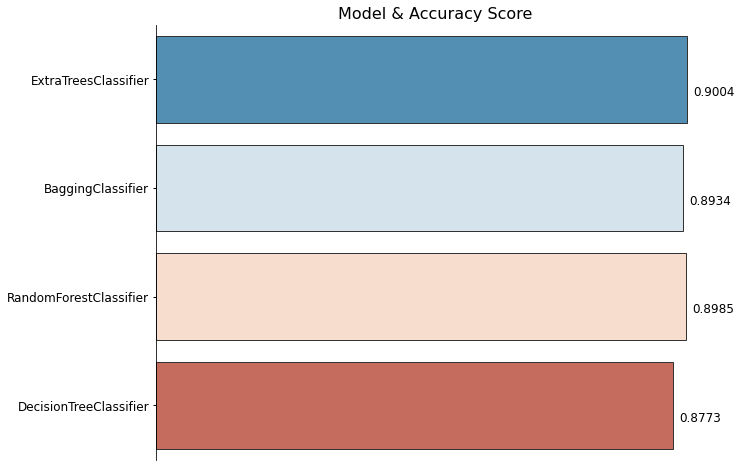

In [117]:
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=m_df, ax=ax,palette='RdBu_r',edgecolor=".2", orient="h")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+.55, \
        str("{:.4f}").format(round((i.get_width()), 4)), fontsize=12, color='black') 
kwargs= {'length':3, 'width':1, 'colors':'black','labelsize':'large'}
ax.tick_params(**kwargs)
x_axis = ax.axes.get_xaxis().set_visible(False)
ax.set_title('Model & Accuracy Score',fontsize=16)
sns.despine(bottom=True)
plt.show()

Sur les 11 modèles testés, 4 se dégagent nettement avec des accuracy intéressants, ces modèles sont essentiellement des algorithmes de classification d'ensemble: 

<li> ExtraTreesClassifier, 
<li> RandomForest, 
<li> Le Bagging Classifier,
<li> DecisionTreeClassifier

Les performances élèvées de nos 4 modèles retenus en terme d'accuracy suscitent de la prudence dans l'interprétation des résultats. En effet, un surapprentissage de nos modèles pourrait avoir pour effet une difficulté de généralisation de ceux-ci sur de nouveaux jeux de données en terme prédictif. 

Un des meilleurs moyens de voir un effet de surapprentissage sur l'echantillon d'apprentissage et plus globalement sur la taille du jeu de données des modèles est la répresentation de ceux-ci en courbe d'apprentissage

In [ ]:
kfold = StratifiedKFold(n_splits=5)
md.plot_learning_curve(ExtraTreesClassifier(),"Extra Trees Classifier Learning curves",X_train,y_train,cv=kfold)
md.plot_learning_curve(RandomForestClassifier(),"Random Forest Classifier Learning curves",X_train,y_train,cv=kfold)
md.plot_learning_curve(DecisionTreeClassifier(),"Gradient Boosting Classifier mearning curves",X_train,y_train,cv=kfold)
md.plot_learning_curve(BaggingClassifier(),"Bagging Classifier Learning curves",X_train,y_train,cv=kfold)